# projet MT

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

In [54]:
df = pd.read_csv('../data/loan_data.csv'); df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


### Le but est de pouvoir, grace au machine learning, anticiper si il y a un risque de dégradation lors de la location d'un appartement ou d'une maison

In [56]:
# On supprime les colones contenant des NaN
df = df.dropna(axis=0, how='any') ; df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
71,100083,0,Cash loans,M,Y,Y,0,103500.0,573628.5,24435.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
124,100145,0,Cash loans,F,Y,Y,1,202500.0,260725.5,16789.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
152,100179,0,Cash loans,F,Y,N,0,202500.0,675000.0,53329.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
161,100190,0,Cash loans,M,Y,N,0,162000.0,263686.5,24781.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
255,100295,1,Cash loans,M,Y,N,1,225000.0,1019205.0,31032.0,...,1,0,0,0,0.0,0.0,0.0,6.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307358,456083,0,Cash loans,F,Y,Y,2,112500.0,361462.5,16051.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
307359,456084,0,Cash loans,F,Y,Y,1,99000.0,675000.0,21906.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307407,456140,1,Cash loans,F,Y,Y,1,261000.0,711454.5,47673.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
307456,456195,0,Cash loans,F,Y,Y,0,94500.0,270000.0,15075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


In [57]:
# On remplace les objects par des valeurs que les fonctions pourront utiliser
dico = {"M":1, "F":0, "Y":1, "N":0}
df = df.replace(to_replace=dico, value=None) ; df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
71,100083,0,Cash loans,1,1,1,0,103500.0,573628.5,24435.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
124,100145,0,Cash loans,0,1,1,1,202500.0,260725.5,16789.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
152,100179,0,Cash loans,0,1,0,0,202500.0,675000.0,53329.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
161,100190,0,Cash loans,1,1,0,0,162000.0,263686.5,24781.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
255,100295,1,Cash loans,1,1,0,1,225000.0,1019205.0,31032.0,...,1,0,0,0,0.0,0.0,0.0,6.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307358,456083,0,Cash loans,0,1,1,2,112500.0,361462.5,16051.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
307359,456084,0,Cash loans,0,1,1,1,99000.0,675000.0,21906.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307407,456140,1,Cash loans,0,1,1,1,261000.0,711454.5,47673.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
307456,456195,0,Cash loans,0,1,1,0,94500.0,270000.0,15075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8602 entries, 71 to 307482
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(44), object(13)
memory usage: 8.1+ MB


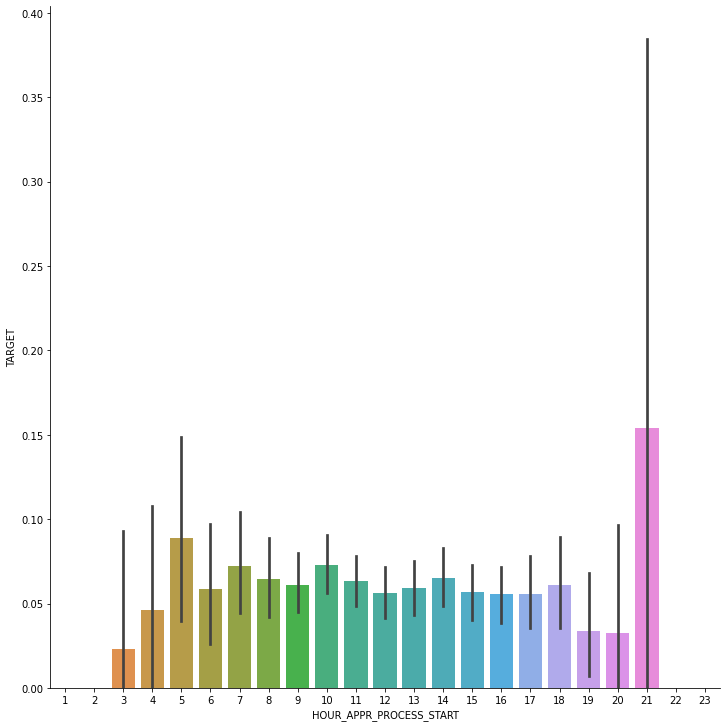

In [65]:
# Diagramme 
sns.catplot(x="HOUR_APPR_PROCESS_START", y="TARGET", data= df, kind="bar", height=10)

In [60]:
df_corr = df.corr(); df_corr

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,0.015474,-0.012206,NaN,-0.007462,0.005075,-0.011396,-0.013768,-0.032327,-0.016785,...,0.022281,0.003473,-0.005464,0.006155,-0.010707,0.001187,-0.007661,-0.010726,-0.008949,-0.017236
TARGET,0.015474,1.000000,0.033103,NaN,0.003398,-0.019993,-0.039762,-0.014634,-0.000765,-0.021950,...,-0.006139,0.013976,-0.008259,-0.003892,0.012156,0.014616,0.015000,-0.004202,0.016465,0.033832
CODE_GENDER,-0.012206,0.033103,1.000000,NaN,-0.056212,-0.020016,0.104820,-0.033866,0.006283,-0.033341,...,0.000468,-0.014921,-0.018585,0.014969,0.013602,0.004925,-0.005709,0.016955,0.001697,0.017062
FLAG_OWN_CAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_OWN_REALTY,-0.007462,0.003398,-0.056212,NaN,1.000000,0.029913,-0.005579,-0.041779,0.007923,-0.048085,...,-0.096187,-0.025383,-0.040270,-0.022632,0.018160,-0.013311,-0.004906,-0.009066,0.030353,0.068681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,0.001187,0.014616,0.004925,NaN,-0.013311,-0.002712,-0.001641,0.018995,0.014015,0.019636,...,0.005988,-0.001495,-0.002006,-0.000945,0.214817,1.000000,0.215462,-0.002107,-0.014587,0.003018
AMT_REQ_CREDIT_BUREAU_WEEK,-0.007661,0.015000,-0.005709,NaN,-0.004906,-0.001043,0.024093,0.012926,0.026397,0.014701,...,-0.007608,-0.004512,-0.006055,-0.002853,0.021885,0.215462,1.000000,-0.012199,-0.043595,0.024866
AMT_REQ_CREDIT_BUREAU_MON,-0.010726,-0.004202,0.016955,NaN,-0.009066,-0.023803,0.024042,0.056718,0.025826,0.053417,...,-0.009728,-0.003885,-0.004528,-0.005364,0.013652,-0.002107,-0.012199,1.000000,-0.035314,-0.010767
AMT_REQ_CREDIT_BUREAU_QRT,-0.008949,0.016465,0.001697,NaN,0.030353,-0.022028,0.006707,0.003209,0.016595,0.004426,...,-0.006256,-0.010430,-0.013997,-0.006595,0.000241,-0.014587,-0.043595,-0.035314,1.000000,0.088951


<AxesSubplot:>

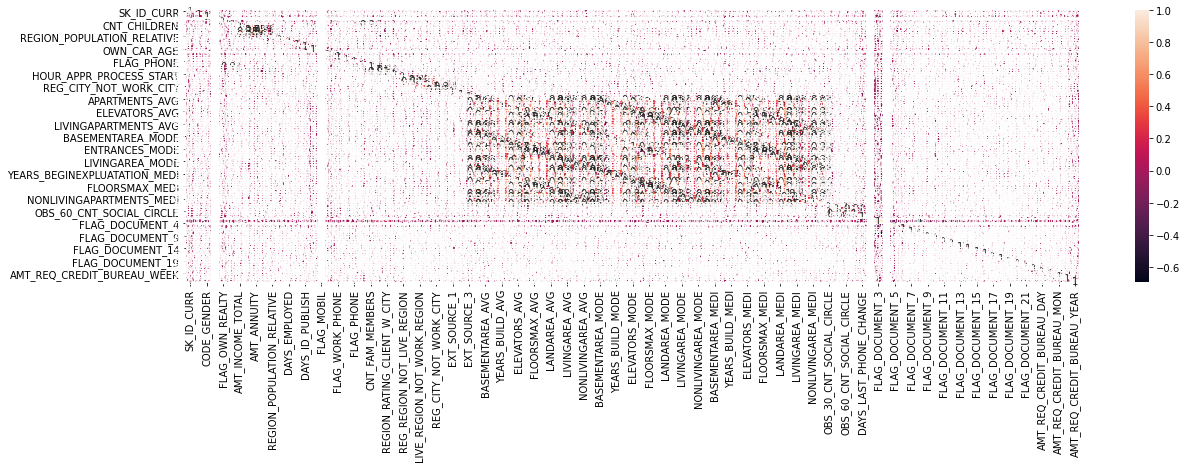

In [61]:
f, ax = plt.subplots(figsize=(20,5))
sns.heatmap(df_corr, annot=True, ax =ax)